In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('events.csv', low_memory=False)

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
file.head(20)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0


In [5]:
file['time'] = pd.to_datetime(file['timestamp'])
file['month'] = file['time'].dt.month

# Compras segun tipo de dispositivo del cual acceden

In [6]:
conv = file.loc[file['event']=='conversion'] 

In [7]:
visited = file.loc[file['event']=='visited site']

In [8]:
visited['Compro'] = visited['person'].isin(conv['person'])

/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
gb = visited.loc[visited['Compro']==True].groupby('device_type')

In [10]:
compraron = gb.agg({'person':'nunique'})

In [11]:
total = visited.groupby('device_type').agg({'person':'nunique'})

In [12]:
compraron['total'] = total['person']

In [13]:
compraron.columns = ['Compras','Visitas']
compraron['porcentaje'] = compraron['Compras']/compraron['Visitas']

Text(0.5,1,'Personas que compraron por dispositivo vs el total que entraron por ese dispositivo')

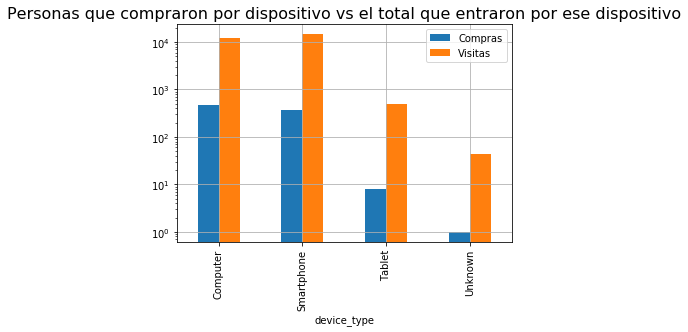

In [14]:
compraron.plot.bar(y=['Compras','Visitas'])
plt.yscale('log')
plt.grid()
plt.title('Personas que compraron por dispositivo vs el total que entraron por ese dispositivo',size=16)

# Visitas segun canal que las originó, evolucion en el tiempo

In [15]:
visited['month'].value_counts()

5    40137
6    22419
4    12650
3     7247
2     2790
1     2135
Name: month, dtype: int64

In [16]:
a = visited.groupby('month').agg({'channel':'value_counts'})

In [31]:
forgraph = a.unstack().head(5)

In [45]:
forgraph

channel                                               
channel  Direct Email Organic     Paid Referral Social Unknown
month                                                         
1         618.0   1.0   352.0    711.0    402.0   51.0     NaN
2         819.0   3.0   310.0   1196.0    424.0   38.0     NaN
3        1861.0  17.0   796.0   3354.0   1095.0  124.0     NaN
4        3548.0  12.0  1504.0   5606.0   1940.0   39.0     1.0
5        8214.0  35.0  5770.0  20632.0   5211.0  267.0     8.0

In [68]:
sinunknown = forgraph.drop('Unknown',axis=1,level=1)

AxesSubplot(0.125,0.125;0.775x0.755)


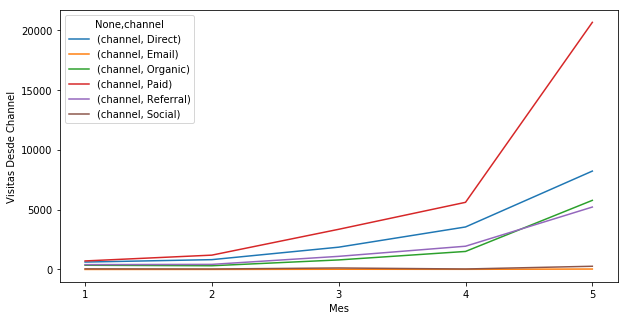

In [98]:
g=sinunknown.plot()
g.set_xticks(ticks=[1,2,3,4,5])
g.set_xlabel('Mes')
g.set_ylabel('Visitas Desde Channel')
print(g)